# Data Acquisition and Loading

## 1.Importing Necessasry Libraries

In [6]:
import pandas as pd
import numpy as np

## 2.Loading and Reading the dataset

In [7]:
df=pd.read_csv("iot_agriculture_data.csv")

In [3]:
df

,FieldID,SoilMoisture,SoilTemperature,AirTemperature,Humidity,pH,NutrientLevel,Rainfall,Sunlight,CropType,SensorID,ReadingTimestamp
0,1,33.33,14.44,28.20,25.21,5.99,43.86,38.04,11.96,Soybean,406,2024-03-31 07:31:57.633108
1,2,49.08,22.60,15.38,86.90,7.01,128.46,58.78,11.13,Rice,39,2024-01-25 22:53:29.296278
2,3,48.11,26.21,23.09,80.60,6.43,93.61,111.26,10.89,Rice,306,2023-07-30 11:18:40.015640
3,4,31.80,27.35,15.18,60.96,6.70,121.03,80.03,10.62,Wheat,656,2023-09-12 04:20:10.113652
4,5,64.64,14.62,22.26,37.31,7.58,137.87,89.24,9.62,Rice,840,2023-12-31 01:00:09.239809
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,54.63,21.83,27.33,90.55,8.13,181.17,188.84,11.66,Other,134,2023-12-27 14:35:16.639113
4996,4997,31.57,34.57,36.43,96.68,6.07,162.82,158.73,6.29,Wheat,566,2023-08-22 07:27:46.165350
4997,4998,18.63,27.70,16.24,58.44,6.99,108.39,189.07,9.26,Wheat,924,2024-04-28 00:47:42.441002
4998,4999,46.19,28.70,30.80,20.85,7.73,11.46,113.95,9.27,Rice,562,2024-04-08 01:52:15.884876


# Data Cleaning and Preparation

## 1. Checking for missing and duplicate values

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.duplicated().sum()

0

## 2.Checking the data types

In [11]:
print(df.dtypes)

FieldID               int64
SoilMoisture        float64
SoilTemperature     float64
AirTemperature      float64
Humidity            float64
pH                  float64
NutrientLevel       float64
Rainfall            float64
Sunlight            float64
CropType             object
SensorID              int64
ReadingTimestamp     object
dtype: object


In [10]:
numerical = df.select_dtypes(exclude = object)

In [7]:
numerical

,FieldID,SoilMoisture,SoilTemperature,AirTemperature,Humidity,pH,NutrientLevel,Rainfall,Sunlight,SensorID
0,1,33.33,14.44,28.20,25.21,5.99,43.86,38.04,11.96,406
1,2,49.08,22.60,15.38,86.90,7.01,128.46,58.78,11.13,39
2,3,48.11,26.21,23.09,80.60,6.43,93.61,111.26,10.89,306
3,4,31.80,27.35,15.18,60.96,6.70,121.03,80.03,10.62,656
4,5,64.64,14.62,22.26,37.31,7.58,137.87,89.24,9.62,840
...,...,...,...,...,...,...,...,...,...,...
4995,4996,54.63,21.83,27.33,90.55,8.13,181.17,188.84,11.66,134
4996,4997,31.57,34.57,36.43,96.68,6.07,162.82,158.73,6.29,566
4997,4998,18.63,27.70,16.24,58.44,6.99,108.39,189.07,9.26,924
4998,4999,46.19,28.70,30.80,20.85,7.73,11.46,113.95,9.27,562


In [8]:
categorical = df.select_dtypes(include='object')

In [9]:
categorical

,CropType,ReadingTimestamp
0,Soybean,2024-03-31 07:31:57.633108
1,Rice,2024-01-25 22:53:29.296278
2,Rice,2023-07-30 11:18:40.015640
3,Wheat,2023-09-12 04:20:10.113652
4,Rice,2023-12-31 01:00:09.239809
...,...,...
4995,Other,2023-12-27 14:35:16.639113
4996,Wheat,2023-08-22 07:27:46.165350
4997,Wheat,2024-04-28 00:47:42.441002
4998,Rice,2024-04-08 01:52:15.884876


# Exploratory Data Analysis

## 1.Descriptive Statistics

In [12]:
df.describe()

,FieldID,SoilMoisture,SoilTemperature,AirTemperature,Humidity,pH,NutrientLevel,Rainfall,Sunlight,SensorID
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,44.936304,22.683566,27.728750,60.137432,6.244472,103.692338,99.772414,8.540912,492.528000
std,1443.520003,20.330018,7.182668,7.281681,22.999602,1.302962,54.176484,57.629225,2.019626,292.725175
min,1.000000,10.010000,10.010000,15.010000,20.010000,4.000000,10.020000,0.130000,5.000000,1.000000
25%,1250.750000,27.160000,16.537500,21.497500,39.887500,5.100000,57.465000,49.947500,6.787500,232.000000
50%,2500.500000,45.005000,22.850000,27.880000,60.180000,6.250000,102.780000,99.305000,8.535000,491.000000
75%,3750.250000,62.790000,28.775000,34.030000,80.252500,7.360000,149.682500,149.950000,10.310000,751.000000
max,5000.000000,79.990000,35.000000,39.990000,100.000000,8.500000,199.990000,199.920000,12.000000,1000.000000


In [13]:
print("Descriptive statistics for numerical columns:")
print(df.describe())

# Descriptive statistics for categorical columns
print("Descriptive statistics for categorical columns:")
print(df.describe(include=['object', 'category']))

Descriptive statistics for numerical columns:
           FieldID  SoilMoisture  SoilTemperature  AirTemperature  \
count  5000.000000   5000.000000      5000.000000     5000.000000   
mean   2500.500000     44.936304        22.683566       27.728750   
std    1443.520003     20.330018         7.182668        7.281681   
min       1.000000     10.010000        10.010000       15.010000   
25%    1250.750000     27.160000        16.537500       21.497500   
50%    2500.500000     45.005000        22.850000       27.880000   
75%    3750.250000     62.790000        28.775000       34.030000   
max    5000.000000     79.990000        35.000000       39.990000   

          Humidity           pH  NutrientLevel     Rainfall     Sunlight  \
count  5000.000000  5000.000000    5000.000000  5000.000000  5000.000000   
mean     60.137432     6.244472     103.692338    99.772414     8.540912   
std      22.999602     1.302962      54.176484    57.629225     2.019626   
min      20.010000     4.000

## 2.Visualize Distribution of Numeric and Categorical Values

In [15]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.5 kB ? eta -:--:--
     ------- ------------------------------- 30.7/165.5 kB 1.3 MB/s eta 0:00:01
     ------------- ----------------------- 61.4/165.5 kB 656.4 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/165.5 kB 573.4 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/165.5 kB 525.1 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/165.5 kB 544.7 kB/s eta 0:00:01
     ------------------------------- ---- 143.4/165.5 kB 532.5 kB/s eta 0:00:01
     ------------------------------------ 165.5/165.5 kB 522.7 kB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----------------------

In [2]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
numeric_columns = df.select_dtypes(include='number').columns

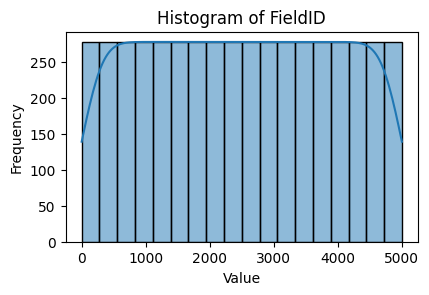

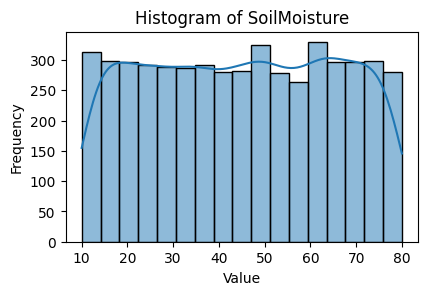

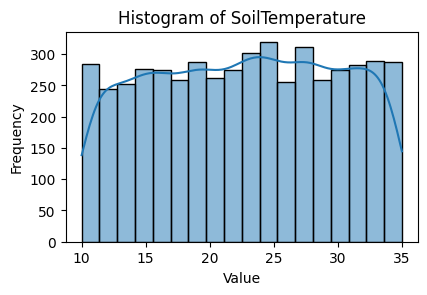

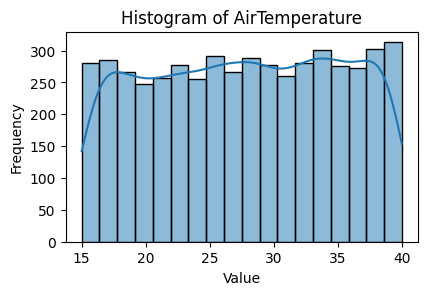

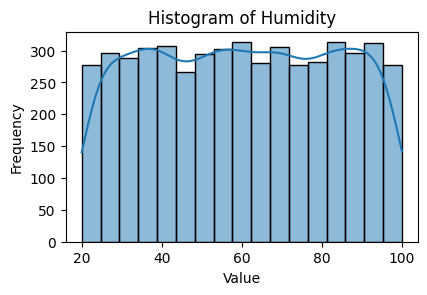

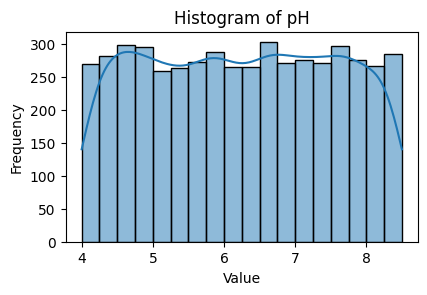

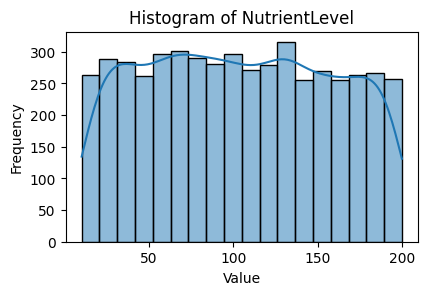

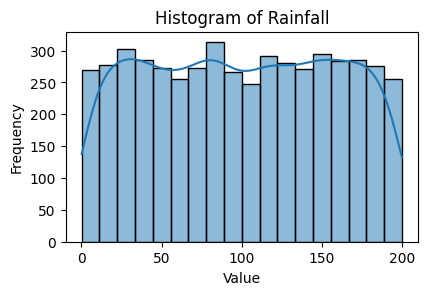

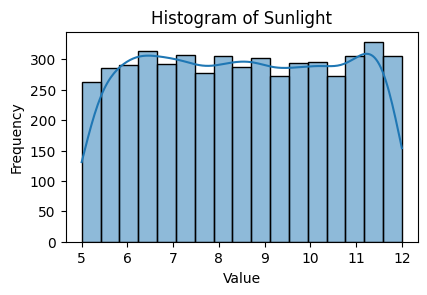

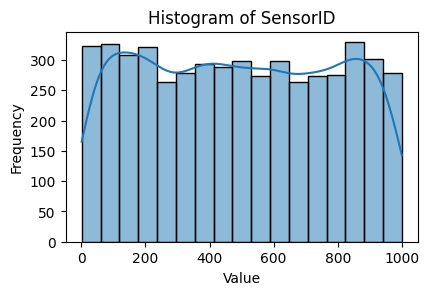

In [14]:
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    
    
    plt.subplot(2, 2, 1) 
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

In [15]:
categorical_columns = df.select_dtypes(include='object').columns


C:\Users\bikas\AppData\Local\Temp\ipykernel_2448\1734885072.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')
C:\Users\bikas\AppData\Local\Temp\ipykernel_2448\1734885072.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


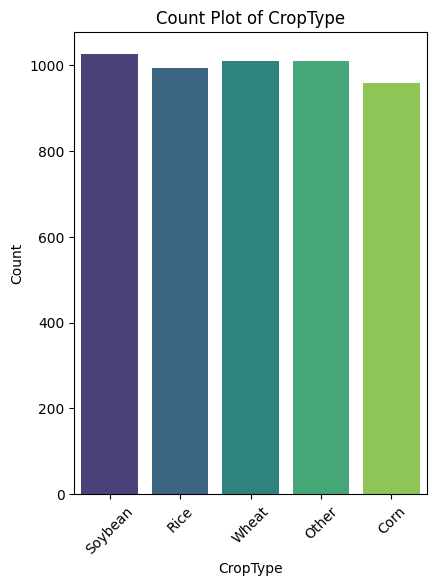

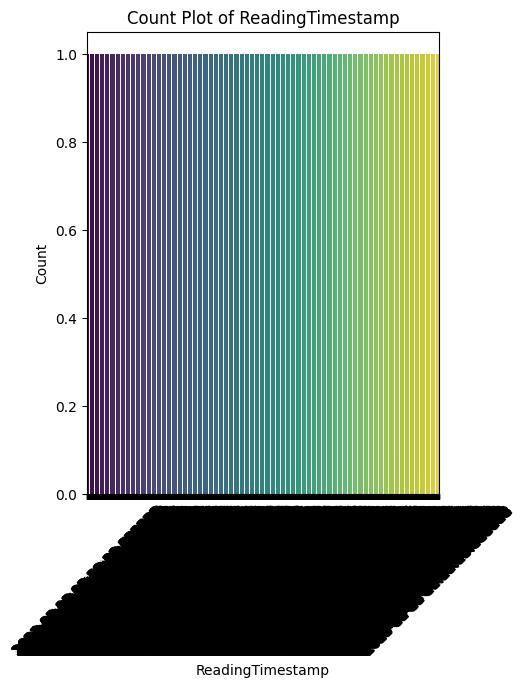

In [16]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    
    # Bar plot
    plt.subplot(1, 2, 1)  # Adjust subplot grid as per your preference
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45) 

In [20]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

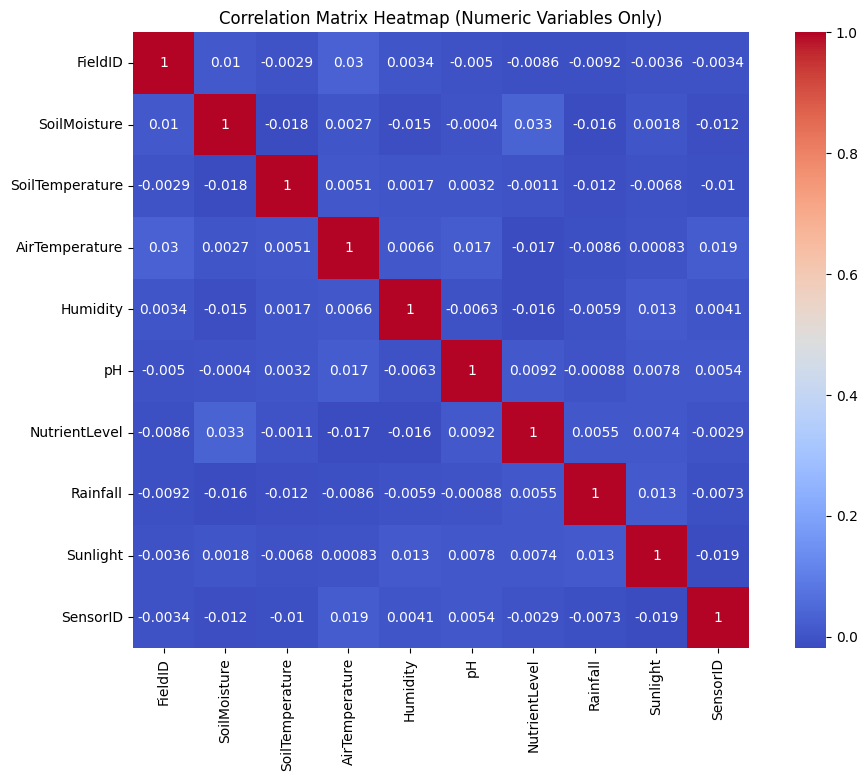

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap (Numeric Variables Only)')
plt.show()